<a href="https://colab.research.google.com/github/eternaldemon/Augmented-Touch-Reality/blob/master/Touch%20Detection%20using%20Image%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [221]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


In [165]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [166]:
url='/content/gdrive/My Drive/Capstone Dataset/Dataset1/'
train_dir=os.path.join(url,'train')
test_dir=os.path.join(url,'test')
#path_of_rar=tf.keras.utils.get_file('demo.rar',origin=url,extract=True)

In [167]:
train_touch_dir=os.path.join(train_dir,'touch')
train_nontouch_dir=os.path.join(train_dir,'nontouch')

In [171]:
test_touch_dir=os.path.join(test_dir,'touch')
test_nontouch_dir=os.path.join(test_dir,'nontouch')

In [24]:
#PATH = os.path.join(os.path.dirname(path_of_rar), 'TouchDetection')

In [21]:
#train_dir = os.path.join(PATH, 'train')
#validation_dir = os.path.join(PATH, 'validation')

In [22]:
#train_touch_dir = os.path.join(train_dir, 'touch')  
#train_nontouch_dir = os.path.join(train_dir, 'nontouch')  
#validation_touch_dir = os.path.join(validation_dir, 'touch')  
#validation_nontouch_dir = os.path.join(validation_dir, 'nontouch')

In [172]:
num_touch_tr=len(os.listdir(train_touch_dir))
num_nontouch_tr=len(os.listdir(train_nontouch_dir))

num_touch_test=len(os.listdir(test_touch_dir))
num_nontouch_test=len(os.listdir(test_nontouch_dir))

total_train = num_touch_tr+num_nontouch_tr
total_test = num_nontouch_test+num_touch_test

In [173]:
batch_size = 10
epoch = 20
IMG_HEIGHT = 240
IMG_WIDTH = 320

In [174]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [175]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 150 images belonging to 2 classes.


In [176]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 15 images belonging to 2 classes.


In [177]:
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

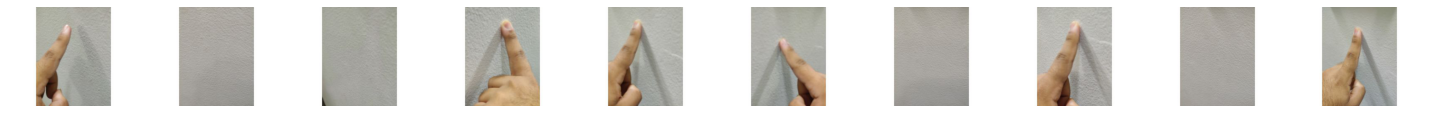

In [178]:
plotImages(sample_training_images[:10])

In [179]:
train_data_gen

In [238]:
model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(240,320,3)),
    BatchNormalization(),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.1),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [239]:
opt = tf.keras.optimizers.Adam(0.0005)


model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [240]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 240, 320, 16)      448       
_________________________________________________________________
batch_normalization_19 (Batc (None, 240, 320, 16)      64        
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 240, 320, 16)      2320      
_________________________________________________________________
batch_normalization_20 (Batc (None, 240, 320, 16)      64        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 120, 160, 16)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 120, 160, 32)      4640      
_________________________________________________________________
batch_normalization_21 (Batc (None, 120, 160, 32)    

In [241]:
h2 = model.fit(train_data_gen,epochs=50,verbose=1,validation_data=test_data_gen)

Epoch 1/50
15/15 [==============================] - 28s 2s/step - loss: 10.3532 - accuracy: 0.7600 - val_loss: 0.7118 - val_accuracy: 0.6667
Epoch 2/50
15/15 [==============================] - 28s 2s/step - loss: 2.4114 - accuracy: 0.9000 - val_loss: 0.6794 - val_accuracy: 0.6667
Epoch 3/50
15/15 [==============================] - 28s 2s/step - loss: 1.6166 - accuracy: 0.9333 - val_loss: 0.9283 - val_accuracy: 0.0667
Epoch 4/50
15/15 [==============================] - 28s 2s/step - loss: 0.6628 - accuracy: 0.9467 - val_loss: 1.0016 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 31s 2s/step - loss: 0.2992 - accuracy: 0.9867 - val_loss: 0.9973 - val_accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 28s 2s/step - loss: 0.1685 - accuracy: 0.9867 - val_loss: 1.0145 - val_accuracy: 0.6667
Epoch 7/50
15/15 [==============================] - 28s 2s/step - loss: 0.0111 - accuracy: 0.9933 - val_loss: 1.2140 - val_accuracy: 0.6000
Epoch 8/50
15/15 [=

In [262]:
acc=h2.history['accuracy']
val_acc=h2.history['val_accuracy']

loss=h2.history['loss']
val_loss=h2.history['val_loss']

epochs_range=range(epochs)

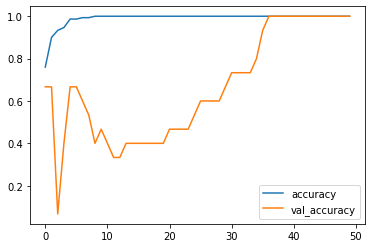

In [263]:
plt.figure()
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_accuracy')
plt.legend()

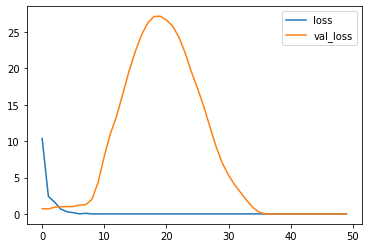

In [264]:
plt.figure()
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [265]:
test = '/content/gdrive/My Drive/Capstone Dataset/Dataset1/test/touch/touch29.jpg'
test1='/content/gdrive/My Drive/Capstone Dataset/Dataset1/test/nontouch/notouch100.jpg'

test2 = '/content/gdrive/My Drive/Capstone Dataset/test2.jpg/'
test3='/content/gdrive/My Drive/Capstone Dataset/test3.jpg'

In [274]:
#temp = tf.keras.utils.get_file('test.jpg',origin=test)

In [286]:
from google.colab import files 
files.upload()

Saving notouch49.jpg to notouch49.jpg


{'notouch49.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x00\xf0\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x07\x04\x05\x06\x08\xff\xc4\x00?\x10\x00\x01\x03\x02\x04\x04\x02\x06\x08\x03\t\x01\x01\x00\x00\x00\x01\x00\x02\x11\x03!\x04\x121A\x06"Qa\x05q\x07\x132B\x81\xb2\x166Rr\x82\x91\xa1\xb1\x15b\xb3\x14#3s\x83\xc1\xd1\xf0\xf1%\x92\xff\xc4\x00\x19\x01\x01\x01\x00\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x04\x05\x03\xff\xc4\x00\'\x11\x01\x01\x00\x02\x02\x02\x01\x03\x03\x05\x00\x00\x00\x00\x00\x00\x00\x01\x02\x

In [287]:
temp = plt.imread('notouch49.jpg')
#temp=temp/255.0

In [288]:
temp= np.array(temp)
temp = np.reshape(temp,(1,240,320,3))
temp.shape
temp = temp/255.0

LABELS:


---


After using argmax()





Touch : 1

No Touch : 0


In [289]:
p = model.predict(temp)
print(p)

[[-82.18183]]


In [281]:
p.argmax(axis=0)

array([0])

In [149]:
temp.flatten()
temp.shape

(240, 320, 3)

In [247]:
classes = train_data_gen.classes
print(classes)

class2 = train_data_gen.class_mode
print(class2)

class3 = train_data_gen.data_format
print(class3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
binary
channels_last


In [261]:
classes[100]

1

In [252]:
train_data_gen[0]

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [